
<span style="font-size: 18px; font-weight: bold">PASTICIER Benjamin</span><br>
<br><br>

<center><span style="font-size: 40px; font-weight: bold">LU3PY121 - Electromagntésime et Optique</span></center><br>
<center><span style="font-size: 35px; font-weight: bold">TP2</span></center>
<br><br>

## Introduction

En physique expérimentale, nous utilisons souvent des histogrammes pour présenter des mesures, mais les données de ces histogrammes sont souvent arbitraires. Afin d'interpréter ces données, il est nécessaire de trouver un lien entre les données arbitraires qui en résultent et les quantités physiques pertinentes.

Dans ce TP, nous utiliserons trois ensembles de données avec des moyennes connues pour déduire la relation entre une valeur donnée et la vitesse physique, et l'utiliser pour identifier les données inconnues.


## **Ajustement d’histogrammes**

### 1. Lecture des données

In [2]:
# Lecture
import numpy as np
import pandas as pd
p1 = pd.read_csv('pic1.csv') # pic 1
p2 = pd.read_csv('pic2.csv') # pic 2
p3 = pd.read_csv('pic3.csv') # pic 3
pi = pd.read_csv('pic_inconnu.csv') # pic inconnu
pic1 = np.array(p1['mesures']) # liste des mesures dans pic 1
pic2 = np.array(p2['mesures']) # liste des mesures dans pic 2
pic3 = np.array(p3['mesures']) # liste des mesures dans pic 3
pici = np.array(pi['mesures']) # liste des mesures dans pic inconnu

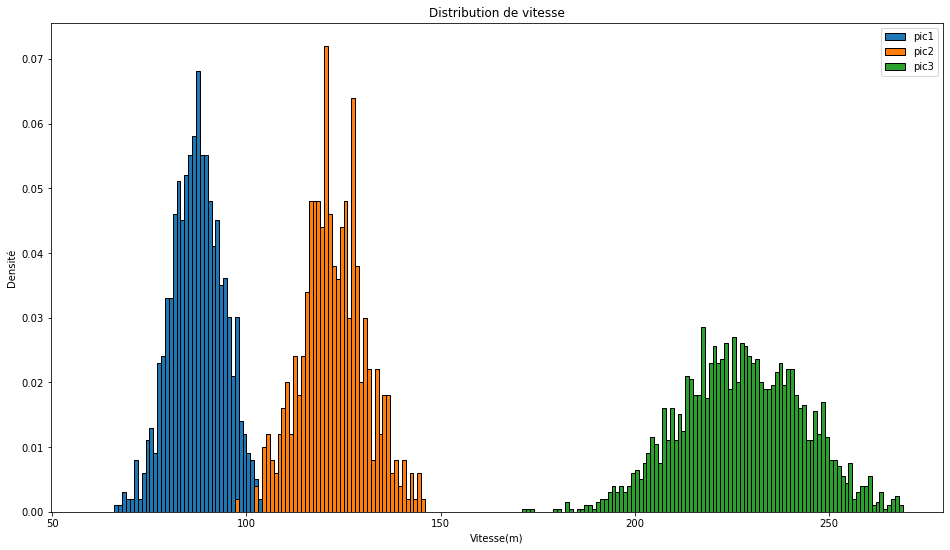

In [3]:
# Graphe
import matplotlib.pyplot as plt
plt.figure(figsize=[16,9]) 
plt.hist(pic1,bins=np.arange(60,110),ec='black',density='True',label='pic1')
plt.hist(pic2,bins=np.arange(90,150),ec='black',density='True',label='pic2')
plt.hist(pic3,bins=np.arange(160,270),ec='black',density='True',label='pic3')
plt.title('Distribution de vitesse')
plt.xlabel('Vitesse(m)')
plt.ylabel('Densité')
plt.legend()
plt.show()

On retrouve bien des distribution gausiennes d'après la figure. Les paramètre de cette distribution sont l'espérance et l'écart type.

### 2. Estimation de la moyenne

#### **Mesure de la moyenne statistique**

In [4]:
# Fonction pour calculer la moyenne de chaque pic et l’erreur associée à ces moyennes
def estime(data):
    moy = np.mean(data)
    ecart = np.std(data)
    err = ecart/moy
    return moy, ecart, err

In [5]:
moy1, ec1, err1 = estime(pic1)
moy2, ec2, err2 = estime(pic2)
moy3, ec3, err3 = estime(pic3)
moyi, eci, erri = estime(pici)

print('Pour pic 1: \nLa moyenne est: %5.3f \nL\'écart type est: %5.3f \nL\'erreur associée est : %5.4f\n'%(moy1, ec1, err1))
print('Pour pic 2: \nLa moyenne est: %5.3f \nL\'écart type est: %5.3f \nL\'erreur associée est : %5.4f\n'%(moy2, ec2, err2))
print('Pour pic 3: \nLa moyenne est: %5.3f \nL\'écart type est: %5.3f \nL\'erreur associée est : %5.4f\n'%(moy3, ec3, err3))
print('Pour pic inconnu: \nLa moyenne est: %5.3f \nL\'écart type est: %5.3f \nL\'erreur associée est : %5.4f\n'%(moyi, eci, erri))

Pour pic 1: 
La moyenne est: 87.404 
L'écart type est: 6.882 
L'erreur associée est : 0.0787

Pour pic 2: 
La moyenne est: 122.423 
L'écart type est: 8.320 
L'erreur associée est : 0.0680

Pour pic 3: 
La moyenne est: 227.458 
L'écart type est: 15.946 
L'erreur associée est : 0.0701

Pour pic inconnu: 
La moyenne est: 157.025 
L'écart type est: 11.864 
L'erreur associée est : 0.0756



On peut constater que le pic 2 possède une moyenne dont l’erreur relative est la plus faible.

#### **Ajustement des données avec QExPy**

In [6]:
import qexpy as q
import qexpy.plotting as qplt

In [7]:
# Fonction d'ajustement pour chaque pic
def ajuster(pic, moy, ec):
    n, bins, figure =qplt.hist(pic, bins=100, ec='black', density='True')
    figure.show()
    result = figure.fit(model=q.FitModel.GAUSSIAN, parguess=[100, moy, ec],color = 'orange')
    figure.show()
    print(result)

Pour pic 1:


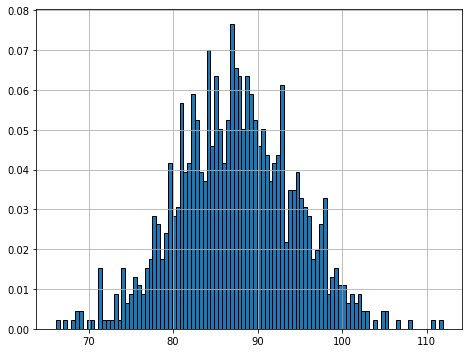

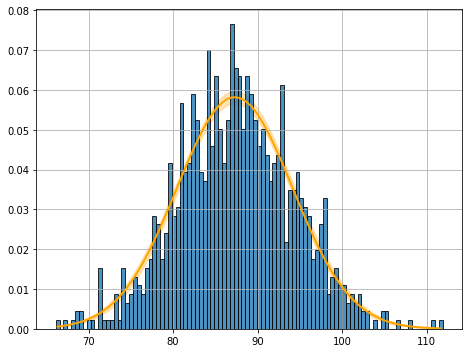

----------------- Fit Results -------------------
Fit of histogram to gaussian

Result Parameter List: 
normalization = 1.00 +/- 0.03,
mean = 87.3 +/- 0.2,
std = 6.9 +/- 0.2

Correlation Matrix: 
[[ 1.000e+00 -2.459e-04  5.777e-01]
 [-2.459e-04  1.000e+00 -3.868e-04]
 [ 5.777e-01 -3.868e-04  1.000e+00]]

chi2/ndof = 0.00/96

--------------- End Fit Results -----------------


In [8]:
#Appliquer la fonction
print('Pour pic 1:')
ajuster(pic1,moy1,ec1)

Pour pic 2:


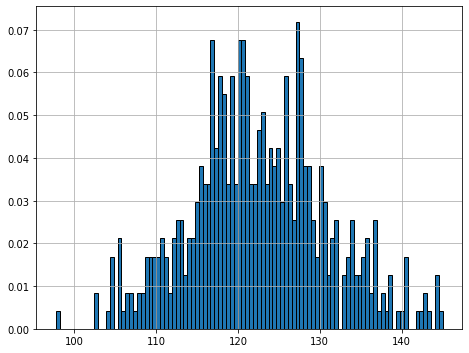

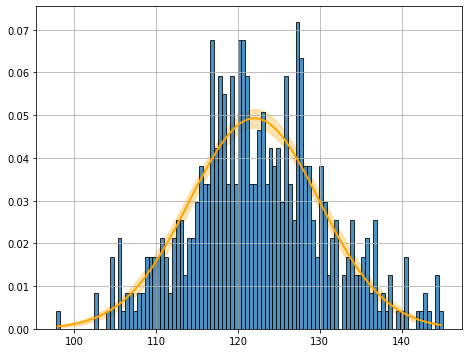

----------------- Fit Results -------------------
Fit of histogram to gaussian

Result Parameter List: 
normalization = 0.98 +/- 0.04,
mean = 122.0 +/- 0.4,
std = 8.0 +/- 0.4

Correlation Matrix: 
[[1.000e+00 4.538e-04 5.785e-01]
 [4.538e-04 1.000e+00 6.997e-04]
 [5.785e-01 6.997e-04 1.000e+00]]

chi2/ndof = 0.00/96

--------------- End Fit Results -----------------


In [9]:
print('Pour pic 2:')
ajuster(pic2,moy2,ec2)

Pour pic 3:


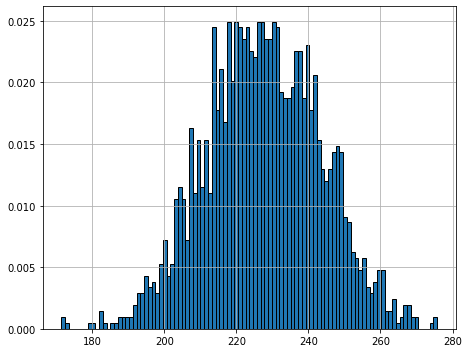

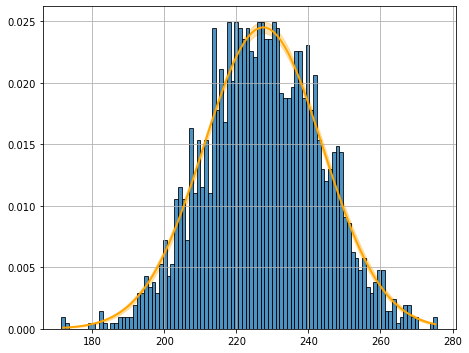

----------------- Fit Results -------------------
Fit of histogram to gaussian

Result Parameter List: 
normalization = 1.01 +/- 0.02,
mean = 227.5 +/- 0.4,
std = 16.5 +/- 0.4

Correlation Matrix: 
[[1.000e+00 5.572e-04 5.780e-01]
 [5.572e-04 1.000e+00 8.673e-04]
 [5.780e-01 8.673e-04 1.000e+00]]

chi2/ndof = 0.00/96

--------------- End Fit Results -----------------


In [10]:
print('Pour pic 3:')
ajuster(pic3,moy3,ec3)

Pour pic inconnu:


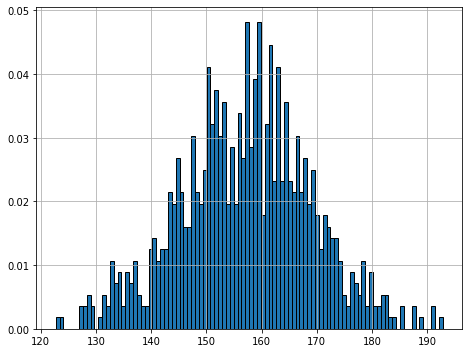

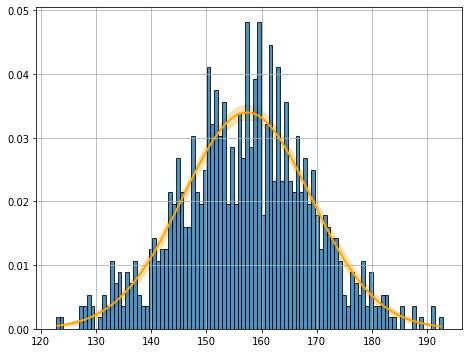

----------------- Fit Results -------------------
Fit of histogram to gaussian

Result Parameter List: 
normalization = 0.99 +/- 0.03,
mean = 157.4 +/- 0.5,
std = 11.7 +/- 0.5

Correlation Matrix: 
[[ 1.000e+00 -1.561e-04  5.783e-01]
 [-1.561e-04  1.000e+00 -2.418e-04]
 [ 5.783e-01 -2.418e-04  1.000e+00]]

chi2/ndof = 0.00/96

--------------- End Fit Results -----------------


In [11]:
print('Pour pic inconnu:')
ajuster(pici,moyi,eci)

### 3. Détermination des paramètres de la calibration

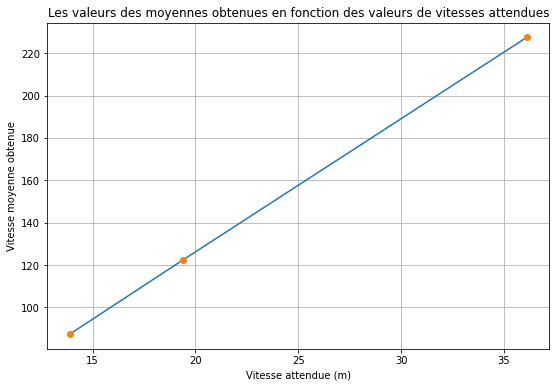

In [12]:
v_a = [13.9, 19.4, 36.1]
v_m = [moy1, moy2, moy3]

plt.figure(figsize=(9,6))
plt.plot(v_a,v_m)
plt.plot(v_a,v_m,'o')
plt.title('Les valeurs des moyennes obtenues en fonction des valeurs de vitesses attendues')
plt.xlabel('Vitesse attendue (m)')
plt.ylabel('Vitesse moyenne obtenue')
plt.grid()
plt.show()

On observe que la relation entre ces deux groupes des données est linéaire. On va utiliser la modèle linéaire pour l'ajuster

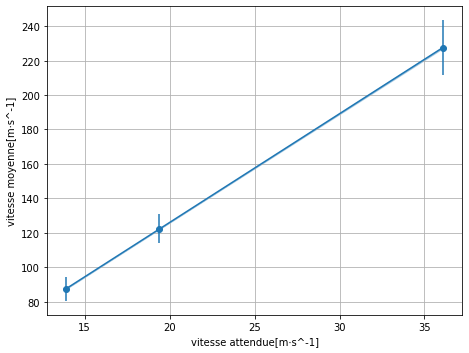

----------------- Fit Results -------------------
Fit of vitesse attendue et vitesse moyenne to linear

Result Parameter List: 
slope = 6.31 +/- 0.02,
intercept = -0.2 +/- 0.5

Correlation Matrix: 
[[ 1.    -0.941]
 [-0.941  1.   ]]

chi2/ndof = 0.00/0

--------------- End Fit Results -----------------


In [13]:
err = np.array([ec1,ec2,ec3])
x = q.MeasurementArray(v_a, unit='m/s', name='vitesse attendue')
y = q.MeasurementArray(v_m, unit='m/s', name='vitesse moyenne', error=err)
qplt.plot(x, y, name = 'vitesse attendue et vitesse moyenne')
figure = qplt.get_plot()
res = figure.fit(model=q.FitModel.LINEAR)
qplt.show()
print(res)

On obtient une relation linéaire de la forme : $ y = a * x + b$ avec x la vitesse attendue, y la vitesse moyenne obtune, $ a = 6.31 \pm 0.02 $, $ b = -0.2 \pm 0.5 $ 

### 4. Calibration en énergie d’un pic

On a $ y = a * x + b $, donc $ x = \frac{y-b}{a} $

In [14]:
# calcul de vitesse de pic inconnu
a = 6.31
b = -0.2
v_i = (moyi - b)/a
print('La vitesse inconnu est : %5.3f m/s'%v_i)

La vitesse inconnu est : 24.917 m/s


D'après la formule de propagation d'erreur, on obtient : $\delta v = v\sqrt{ (\frac{\sqrt{\delta y^2 + \delta b^2}}{y - b})^2 + (\frac{\delta a}{a})^2}$ avec $ \delta y = 11.864 $, $ \delta b = 0.5 $, $ \delta a = 0.02 $

In [15]:
err_v = v_i * np.sqrt((np.sqrt(eci**2 + 0.2**2)/(moyi - b))**2+(0.02/a)**2)
print("L'erreur de la vitesse inconnue est : %5.3f m/s" % err_v)

L'erreur de la vitesse inconnue est : 1.882 m/s


In [17]:
v_kmh = v_i * 3.6
err_kmh = err_v * 3.6
print('La vitesse est : %5.3f km/h \nL\'erreur associée est : %5.3f km/h'%(v_kmh,err_kmh))

La vitesse est : 89.700 km/h 
L'erreur associée est : 6.776 km/h


La vitesse limite sur autoroute est 130 km/h et la vitesse limite sur voie rapide est 110 km/h, donc la valeur obtenue me semble logique.

## Conclusion

Dans ce TP, nous avons d'abord calculé les moyennes, les écarts-types et les erreurs des trois ensembles de données et nous avons les justifiés à l'aide de QExPy. Ensuite, nous avons déterminé les paramètres de la calibration à l'aide de QExPy. Enfin, nous avons calculé la valeur réelle des données inconnues en utilisant les paramètres obtenus à partir de l'ajustement que nous avons fait à l'étape précédente, et nous avons calculé son erreur en utilisant la formule de propagation d'erreur.

Nous avons obtenu finalement:
1. Pour pic 1: 

   La moyenne est: 87.404
   
   L'écart type est: 6.882 
   
   
2. Pour pic 2: 

   La moyenne est: 122.423 
   
   L'écart type est: 8.320 
   
   
3. Pour pic 3: 

    La moyenne est: 227.458 
    
    L'écart type est: 15.946 
    
    
4. Pour pic inconnu: 

    La moyenne est: 157.025 
    
    L'écart type est: 11.864 

En connaissant la valeur attentue des pic 1, 2, 3, nous avons la formule de calibration $ y = a * x + b$ avec x la vitesse attendue, y la vitesse moyenne obtune, $ a = 6.31 \pm 0.02 $, $ b = -0.2 \pm 0.5 $ 

Nous avons par conséquent la vitesse inconnu : $ v = 24.917 \pm 1.882 m/s $, c'est à dire $ v = 89.7 \pm 6.776 m/s $, ce qui est bien logique.